<a href="https://colab.research.google.com/github/ShivamSoni11/Projects_Ai/blob/master/CIFAR_DATASET_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries

In [37]:
import time
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization

from keras.optimizers import SGD
from keras.utils import np_utils
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Set random seed

In [2]:
np.random.seed(903)

## Load CIFAR DATASET

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

_,img_rows,img_cols,colors_channel= train_features.shape
num_classes = len(np.unique(train_labels)) # if values > 2 multi class then we use classical entrop...if == 2 then binary class then binary entrop in loss
num_input_nodes = img_rows * img_cols

print("No. of training samples  : ", train_features.shape[0])
print("No of test samples       : ", test_features.shape[0])

print("Image Rows: ",train_features.shape[1])
print("Image cols: ",train_features.shape[2])

print("Number of classes : ", num_classes)
print("Number of colors channel",colors_channel)

170500096/170498071 [==============================] - 11s 0us/step
No. of training samples  :  50000
No of test samples       :  10000
Image Rows:  32
Image cols:  32
Number of classes :  10
Number of colors channel 3


**Explore the data**

In [4]:
train_features.shape

(50000, 32, 32, 3)

In [5]:
len(train_labels)

50000

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
test_features.shape

(10000, 32, 32, 3)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Showing first 25 exapmples of datasets

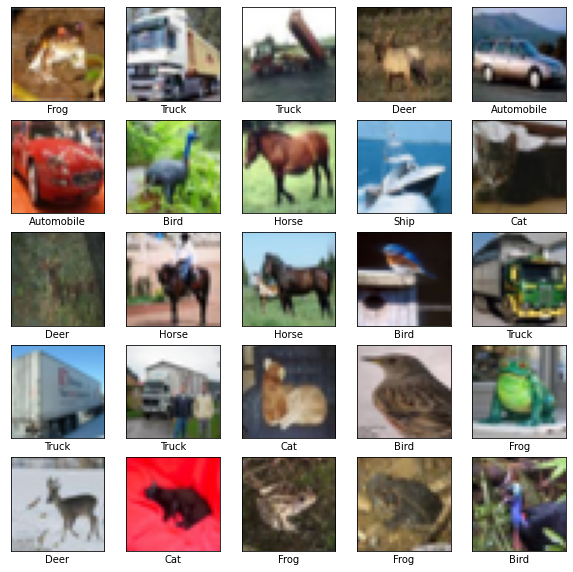

In [10]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_features[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,need the extra index
    plt.xlabel(labels[train_labels[i][0]])
plt.show()

**To check the distribution of each class**

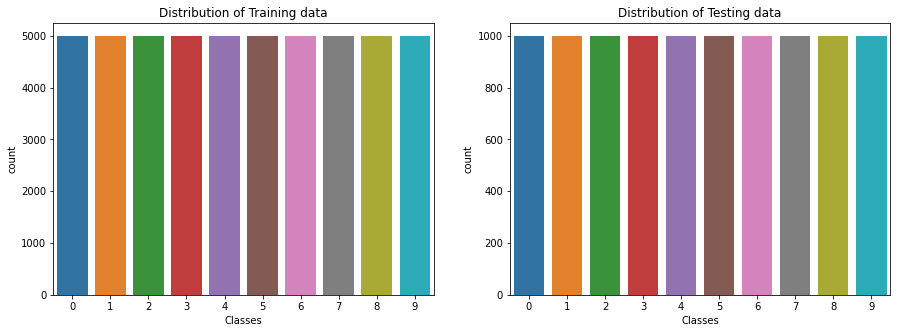

In [11]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(train_labels.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(test_labels.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [12]:
#Normalize

train_features, test_features = train_features / 255.0, test_features / 255.0

In [13]:
# One hot encodig(Convert class vector to binary class metricess)

train_labels_cat = keras.utils.to_categorical(train_labels, num_classes)
test_labels_cat = keras.utils.to_categorical(test_labels, num_classes)
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## **Create Model**

## 1. Base Model

A) Create Model

In [14]:
def deep_nn1():
  # Initialize the model
  model = Sequential()

  #Create input layer and then create hidden layers.
  model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())  


  model.add(Dense(units=256, activation='relu'))

  #Create ouput layers
  model.add(Dense(units=num_classes, activation='softmax'))

  return model


B) Model Summary

In [15]:
model1 = deep_nn1()
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

C) Model Compile

In [16]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D) Model Train

In [17]:
start = time.time()

model_info1 = model1.fit(train_features,train_labels,
                       batch_size =64,
                       epochs=20,
                       verbose = 2,
                       validation_data=(test_features, test_labels_cat),
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

Epoch 1/20
625/625 - 43s - loss: 1.5665 - accuracy: 0.4352 - val_loss: 1.3780 - val_accuracy: 0.4999
Epoch 2/20
625/625 - 43s - loss: 1.2352 - accuracy: 0.5618 - val_loss: 1.1788 - val_accuracy: 0.5879
Epoch 3/20
625/625 - 43s - loss: 1.0873 - accuracy: 0.6163 - val_loss: 1.1000 - val_accuracy: 0.6186
Epoch 4/20
625/625 - 43s - loss: 0.9972 - accuracy: 0.6511 - val_loss: 1.0573 - val_accuracy: 0.6347
Epoch 5/20
625/625 - 43s - loss: 0.9157 - accuracy: 0.6787 - val_loss: 1.0670 - val_accuracy: 0.6337
Epoch 6/20
625/625 - 43s - loss: 0.8411 - accuracy: 0.7061 - val_loss: 0.9821 - val_accuracy: 0.6671
Epoch 7/20
625/625 - 43s - loss: 0.7726 - accuracy: 0.7314 - val_loss: 1.0428 - val_accuracy: 0.6459
Epoch 8/20
625/625 - 42s - loss: 0.7048 - accuracy: 0.7539 - val_loss: 0.9535 - val_accuracy: 0.6823
Epoch 9/20
625/625 - 43s - loss: 0.6463 - accuracy: 0.7743 - val_loss: 0.9860 - val_accuracy: 0.6713
Epoch 10/20
625/625 - 43s - loss: 0.5837 - accuracy: 0.7953 - val_loss: 0.9879 - val_accura

E) Accuracy

In [43]:
test_loss1, test_acc1 = model1.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc1)

313/313 - 3s - loss: 1.6947 - accuracy: 0.6592

Test accuracy: 0.6592000126838684


## 2. Adding Dropout

A) Create Model

In [44]:
def deep_nn2():
  # Initialize the model
  model = Sequential()

  #Create input layer and then create hidden layers.
  model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Flatten()) 

  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(units=32, activation='relu'))
  
  #Create ouput layers
  model.add(Dense(units=num_classes, activation='softmax'))

  return model


B) Model Summary

In [19]:
model2 = deep_nn2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)              

C) Model Compile

In [20]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D) Model Train

In [21]:
start = time.time()

model_info2 = model2.fit(train_features,train_labels,
                       batch_size =64,
                       epochs=20,
                       verbose = 2,
                       validation_data=(test_features, test_labels),
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

Epoch 1/20
625/625 - 46s - loss: 1.7386 - accuracy: 0.3532 - val_loss: 1.4963 - val_accuracy: 0.4600
Epoch 2/20
625/625 - 45s - loss: 1.3917 - accuracy: 0.4963 - val_loss: 1.2679 - val_accuracy: 0.5477
Epoch 3/20
625/625 - 45s - loss: 1.2577 - accuracy: 0.5476 - val_loss: 1.1871 - val_accuracy: 0.5962
Epoch 4/20
625/625 - 45s - loss: 1.1766 - accuracy: 0.5821 - val_loss: 1.1015 - val_accuracy: 0.6132
Epoch 5/20
625/625 - 45s - loss: 1.1065 - accuracy: 0.6077 - val_loss: 1.0330 - val_accuracy: 0.6410
Epoch 6/20
625/625 - 45s - loss: 1.0579 - accuracy: 0.6263 - val_loss: 1.0131 - val_accuracy: 0.6511
Epoch 7/20
625/625 - 45s - loss: 1.0054 - accuracy: 0.6449 - val_loss: 0.9765 - val_accuracy: 0.6603
Epoch 8/20
625/625 - 45s - loss: 0.9701 - accuracy: 0.6572 - val_loss: 0.9475 - val_accuracy: 0.6734
Epoch 9/20
625/625 - 45s - loss: 0.9371 - accuracy: 0.6680 - val_loss: 0.9461 - val_accuracy: 0.6708
Epoch 10/20
625/625 - 45s - loss: 0.9067 - accuracy: 0.6818 - val_loss: 0.9380 - val_accura

E) Model Accuracy

In [45]:
test_loss2, test_acc2 = model2.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc2)

313/313 - 3s - loss: 0.8662 - accuracy: 0.7083

Test accuracy: 0.708299994468689


## 3) Model training with high epochs value

A) Create Model

In [22]:
def deep_nn3():
  # Initialize the model
  model = Sequential()

  #Create input layer and then create hidden layers.
  model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=16, kernel_size=(4,4),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Flatten()) 

  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(units=32, activation='relu'))
  
  #Create ouput layers
  model.add(Dense(units=num_classes, activation='softmax'))

  return model


B) Model Summary

In [23]:
model3 = deep_nn3()
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        8208      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)              

C) Model Complie

In [24]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D) Model Train

In [27]:
start = time.time()

model_info3 = model3.fit(train_features,train_labels,
                       batch_size =128,
                       epochs=40,
                       verbose = 2,
                       validation_data=(test_features, test_labels),
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

Epoch 1/40
313/313 - 38s - loss: 0.9053 - accuracy: 0.6792 - val_loss: 0.9098 - val_accuracy: 0.6867
Epoch 2/40
313/313 - 38s - loss: 0.8962 - accuracy: 0.6836 - val_loss: 0.9171 - val_accuracy: 0.6876
Epoch 3/40
313/313 - 38s - loss: 0.8815 - accuracy: 0.6861 - val_loss: 0.9333 - val_accuracy: 0.6805
Epoch 4/40
313/313 - 38s - loss: 0.8713 - accuracy: 0.6897 - val_loss: 0.9120 - val_accuracy: 0.6850
Epoch 5/40
313/313 - 38s - loss: 0.8599 - accuracy: 0.6937 - val_loss: 0.9384 - val_accuracy: 0.6790
Epoch 6/40
313/313 - 38s - loss: 0.8430 - accuracy: 0.6997 - val_loss: 0.9034 - val_accuracy: 0.6853
Epoch 7/40
313/313 - 38s - loss: 0.8410 - accuracy: 0.7024 - val_loss: 0.9062 - val_accuracy: 0.6835
Epoch 8/40
313/313 - 38s - loss: 0.8281 - accuracy: 0.7040 - val_loss: 0.9265 - val_accuracy: 0.6767
Epoch 9/40
313/313 - 37s - loss: 0.8282 - accuracy: 0.7092 - val_loss: 0.9239 - val_accuracy: 0.6799
Epoch 10/40
313/313 - 38s - loss: 0.8122 - accuracy: 0.7109 - val_loss: 0.9099 - val_accura

E) Model accuracy

In [46]:
test_loss3, test_acc3 = model3.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc3)

313/313 - 3s - loss: 0.8884 - accuracy: 0.7009

Test accuracy: 0.7009000182151794


## 4) Creating model with more dense layer

A) Create Model

In [32]:
def deep_nn4():
  # Initialize the model
  model = Sequential()

  #Create input layer and then create hidden layers.
  model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=(4,4),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Flatten()) 

  model.add(Dense(units=256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(units=64, activation='relu'))

  model.add(Dense(units=16, activation='relu'))
  
  #Create ouput layers
  model.add(Dense(units=num_classes, activation='softmax'))

  return model

B) Model Summary

In [33]:
model4 = deep_nn4()
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)              

C) Model Compile

In [34]:
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D) Model Train

In [35]:
start = time.time()

model_info4 = model4.fit(train_features,train_labels,
                       batch_size =64,
                       epochs=20,
                       verbose = 2,
                       validation_data=(test_features, test_labels),
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

Epoch 1/20
625/625 - 45s - loss: 1.7518 - accuracy: 0.3510 - val_loss: 1.4505 - val_accuracy: 0.4736
Epoch 2/20
625/625 - 44s - loss: 1.3938 - accuracy: 0.4948 - val_loss: 1.2677 - val_accuracy: 0.5523
Epoch 3/20
625/625 - 44s - loss: 1.2522 - accuracy: 0.5516 - val_loss: 1.1700 - val_accuracy: 0.5911
Epoch 4/20
625/625 - 44s - loss: 1.1639 - accuracy: 0.5852 - val_loss: 1.0849 - val_accuracy: 0.6190
Epoch 5/20
625/625 - 44s - loss: 1.0891 - accuracy: 0.6141 - val_loss: 1.0297 - val_accuracy: 0.6459
Epoch 6/20
625/625 - 45s - loss: 1.0310 - accuracy: 0.6363 - val_loss: 0.9968 - val_accuracy: 0.6541
Epoch 7/20
625/625 - 44s - loss: 0.9926 - accuracy: 0.6479 - val_loss: 0.9713 - val_accuracy: 0.6639
Epoch 8/20
625/625 - 44s - loss: 0.9399 - accuracy: 0.6684 - val_loss: 0.9391 - val_accuracy: 0.6769
Epoch 9/20
625/625 - 44s - loss: 0.9028 - accuracy: 0.6812 - val_loss: 0.9061 - val_accuracy: 0.6896
Epoch 10/20
625/625 - 44s - loss: 0.8764 - accuracy: 0.6915 - val_loss: 0.8945 - val_accura

E) Model Accuracy

In [36]:
test_loss4, test_acc4 = model4.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc4)

313/313 - 3s - loss: 0.8753 - accuracy: 0.7018

Test accuracy: 0.7017999887466431


## 5. Creating Model using BatchAnalyzer

A) Create Model

In [38]:
def deep_nn5():
  # Initialize the model
  model = Sequential()

  #Create input layer and then create hidden layers.
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())  
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Flatten()) 

  model.add(Dense(units=256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(units=32, activation='relu'))
  model.add(BatchNormalization())

  #Create ouput layers
  model.add(Dense(units=num_classes, activation='softmax'))

  return model

B) Model Summary

In [39]:
model5 = deep_nn5()
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)         

C) Model Compile

In [40]:
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D) Model Train

In [41]:
start = time.time()

model_info5 = model5.fit(train_features,train_labels,
                       batch_size =64,
                       epochs=20,
                       verbose = 2,
                       validation_data=(test_features, test_labels),
                       validation_split=0.2)
end = time.time()
total_time = round(end-start,2)
print("\n\nModel took {} seconds to train".format(total_time))

Epoch 1/20
625/625 - 74s - loss: 1.6231 - accuracy: 0.4245 - val_loss: 1.3405 - val_accuracy: 0.5156
Epoch 2/20
625/625 - 75s - loss: 1.2807 - accuracy: 0.5390 - val_loss: 1.1523 - val_accuracy: 0.5843
Epoch 3/20
625/625 - 75s - loss: 1.1363 - accuracy: 0.5964 - val_loss: 1.1775 - val_accuracy: 0.5732
Epoch 4/20
625/625 - 75s - loss: 1.0400 - accuracy: 0.6299 - val_loss: 0.9603 - val_accuracy: 0.6573
Epoch 5/20
625/625 - 75s - loss: 0.9772 - accuracy: 0.6513 - val_loss: 1.0530 - val_accuracy: 0.6267
Epoch 6/20
625/625 - 75s - loss: 0.9211 - accuracy: 0.6736 - val_loss: 0.8408 - val_accuracy: 0.7021
Epoch 7/20
625/625 - 75s - loss: 0.8721 - accuracy: 0.6902 - val_loss: 0.8381 - val_accuracy: 0.7047
Epoch 8/20
625/625 - 75s - loss: 0.8390 - accuracy: 0.7021 - val_loss: 0.9432 - val_accuracy: 0.6760
Epoch 9/20
625/625 - 76s - loss: 0.8127 - accuracy: 0.7130 - val_loss: 0.7358 - val_accuracy: 0.7399
Epoch 10/20
625/625 - 76s - loss: 0.7822 - accuracy: 0.7247 - val_loss: 1.4212 - val_accura

E) Model Accuracy

In [42]:
test_loss5, test_acc5 = model5.evaluate(test_features,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc5)

313/313 - 5s - loss: 0.6906 - accuracy: 0.7584

Test accuracy: 0.758400022983551


## **Model Evaluation**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


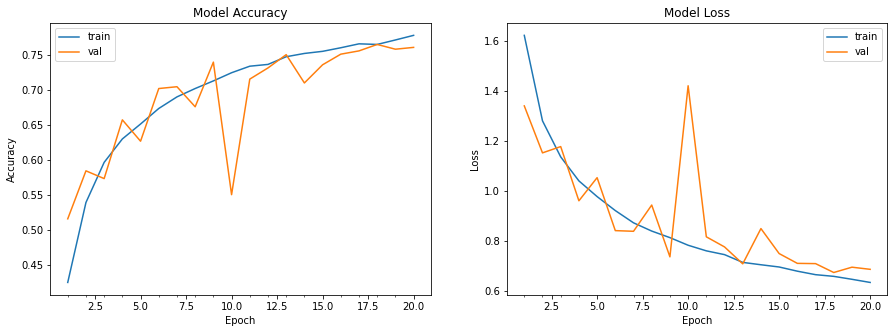

In [48]:
def plot_model_history(model_history):
  fig, axs = plt.subplots(1, 2, figsize=(15,5))

  #Summarize history for accuracy
  axs[0].plot( range(1, len(model_history.history['accuracy'])+1), model_history.history['accuracy'])
  axs[0].plot( range(1, len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'])
  axs[0].set_title('Model Accuracy')

  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')

  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len( model_history.history['accuracy'])/10 )
  axs[0].legend(['train','val'],loc='best')

  #summarize history for loss

  axs[1].plot( range(1, len(model_history.history['loss'])+1), model_history.history['loss'])
  axs[1].plot( range(1, len(model_history.history['val_loss'])+1), model_history.history['val_loss'])
  axs[1].set_title('Model Loss')

  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Loss')

  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len( model_history.history['loss'])/10)
  axs[1].legend(['train','val'],loc='best')

  plt.show()

plot_model_history(model_info5)

## **Output Labels**

In [50]:
obj_names = {
              0:'Airplane',
              1:'Automobile', 
              2:'Bird', 
              3:'Cat',
              4:'Deer',
              5:'Dog',
              6:'Frog',
              7:'Horse', 
              8:'Ship',
              9:'Truck'
            }

##**Prediction**

In [52]:
Predictions = model5.predict(test_features)

In [53]:
Predictions.shape

(10000, 10)

In [73]:
Predictions[1]

array([6.5335515e-04, 9.9649429e-02, 1.8579759e-06, 9.1966211e-07,
       1.8364979e-06, 5.2105783e-08, 3.6428798e-07, 3.3100935e-08,
       8.9918631e-01, 5.0587457e-04], dtype=float32)

In [74]:
np.argmax(Predictions[1])

8

In [75]:
test_labels[1]

array([8], dtype=uint8)

# Label Encoding of data

In [94]:
from sklearn.preprocessing import LabelBinarizer
label_maker = LabelBinarizer()
train_labels_lm = label_maker.fit_transform(train_labels)
test_labels_lm = label_maker.fit_transform(test_labels)
predicted_object = label_maker.inverse_transform(Predictions)

In [95]:
predicted_object[:10]

array([5, 8, 8, 8, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [96]:
test_labels_lm = label_maker.inverse_transform(test_labels_lm)

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
cnn = confusion_matrix(test_labels_lm,predicted_object)
accuracy = accuracy_score(test_labels_lm,predicted_object)

In [104]:
print("Confusion_matrix : \n", cnn)

Confusion_matrix : 
 [[747  14  43  23  33   9  11  11  69  40]
 [  7 830   2   5   1   3  10   5  24 113]
 [ 49   1 544  40 158  57  87  39  11  14]
 [  9   3  36 538  92 135  92  61   8  26]
 [  5   2  18  32 834   9  40  52   6   2]
 [  5   1  15 169  83 612  40  60   6   9]
 [  3   3  16  31  54  11 870   4   3   5]
 [  6   4  17  21  66  34   7 835   3   7]
 [ 32  26   6   8  18   3   7   7 869  24]
 [ 20  25   3   6   5   1   5  10  20 905]]


In [102]:
print("Accuracy score is : ", round(accuracy*100,2))

Accuracy score is :  75.84


In [105]:
import pandas as pd
obj_labels = pd.Series(label_maker.classes_).map(obj_names).values

# Confusion Matrix

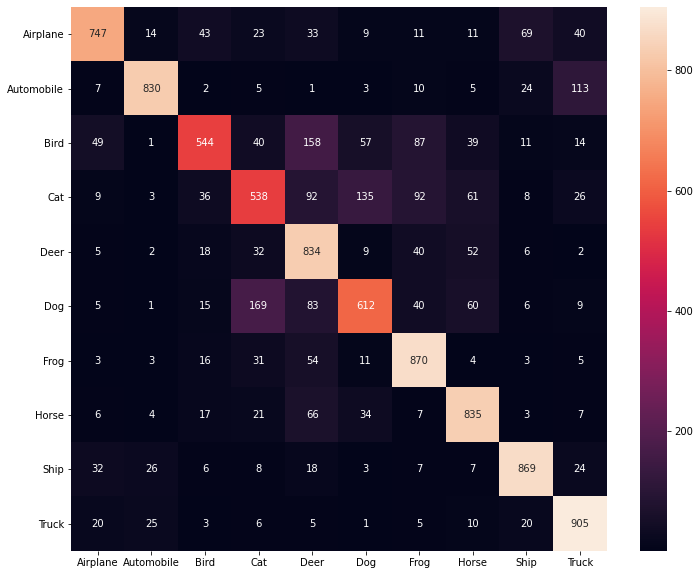

In [107]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(cnn, annot=True, xticklabels=obj_labels,yticklabels=obj_labels,fmt='d')
plt.show()

## Creating function to plot samples 

In [108]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


**Showing Examples**

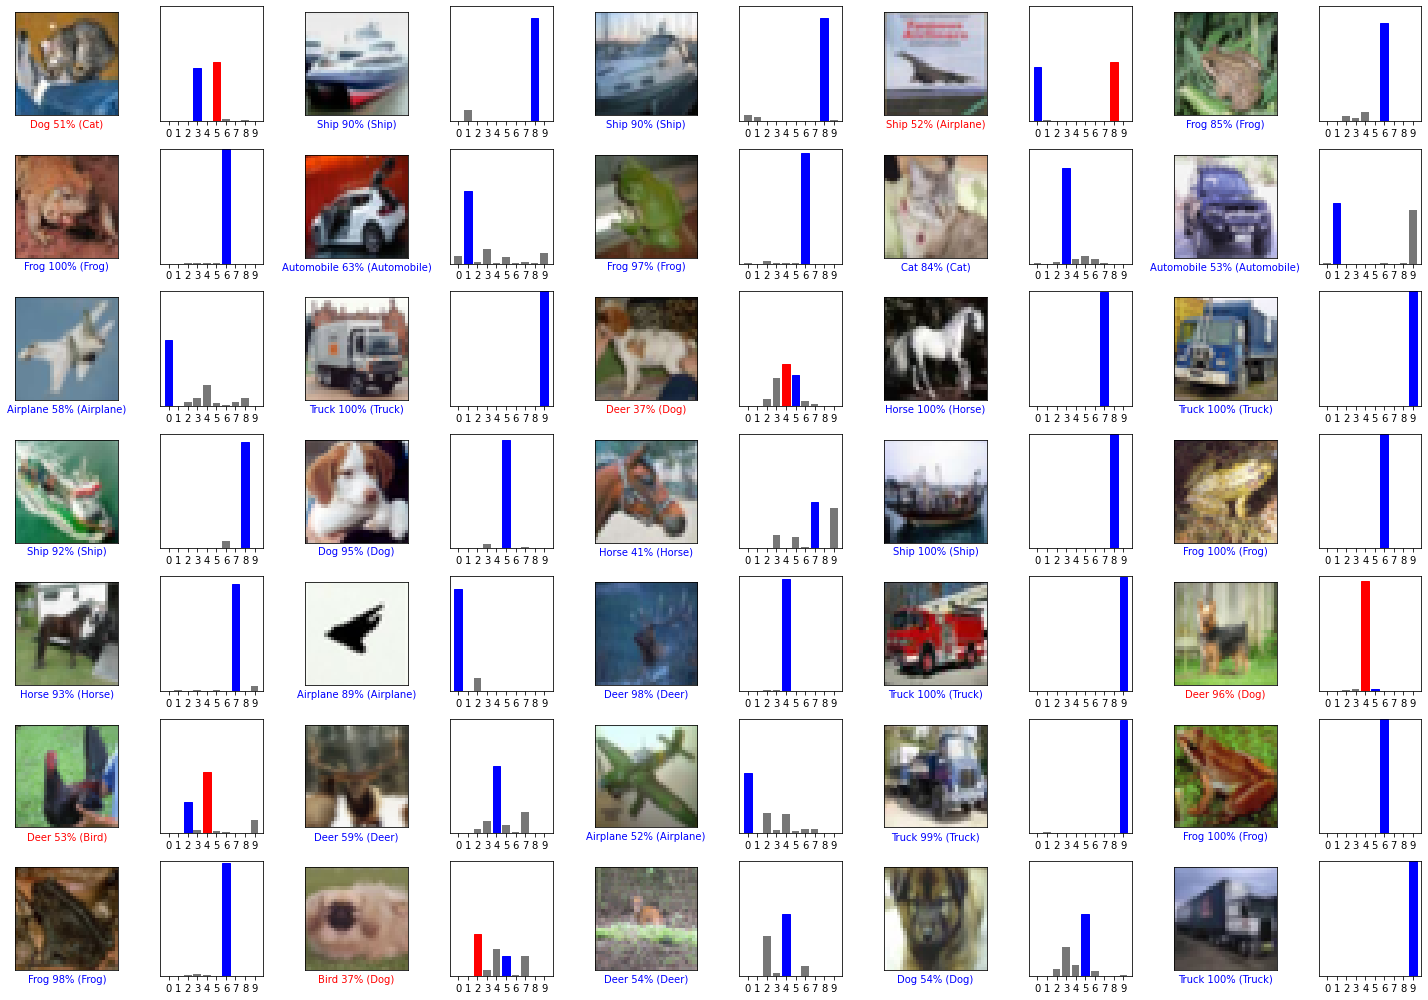

In [110]:
num_rows = 7
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, Predictions[i], test_labels, test_features)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, Predictions[i], test_labels)
plt.tight_layout()
plt.show()

##***Output DATA***

In [114]:
output = pd.DataFrame(columns=['Real Object','Real Index','Predicted Index','Predicted Object'])
output['Real Object'] = test_labels_lm
output['Predicted Object'] = predicted_object
output['Real Index'] = output['Real Object'].map(obj_names)
output['Predicted Index'] = output['Predicted Object'].map(obj_names)
output.head(30)

,Real Object,Real Index,Predicted Index,Predicted Object
0,3,Cat,Dog,5
1,8,Ship,Ship,8
2,8,Ship,Ship,8
3,0,Airplane,Ship,8
4,6,Frog,Frog,6
5,6,Frog,Frog,6
6,1,Automobile,Automobile,1
7,6,Frog,Frog,6
8,3,Cat,Cat,3
9,1,Automobile,Automobile,1
